<a href="https://colab.research.google.com/github/ayushi-3536/MODEHB/blob/testing/plot_mean_stderr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

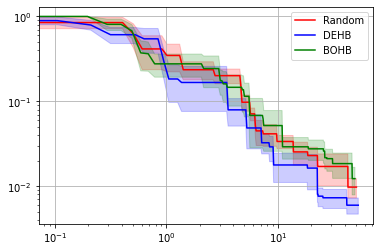

In [1]:
from typing import Optional

import numpy as np
import matplotlib.pyplot as plt


def plot_perf_over_time(
    ax: plt.Axes,
    results: np.ndarray,
    times: np.ndarray,
    time_step_size: int,
    is_time_cumulated: bool,
    label: str,
    show: bool = True,
    color: str = "red",
    runtime_upper_bound: Optional[float] = None,
) -> None:
    """
    Args:
        results (np.ndarray):
            The performance of each experiment per evaluation.
            The shape must be (n_experiments, n_evals).
        times (np.ndarray):
            The runtime of each evaluation or cumulated runtime over each experiment.
            The shape must be (n_experiments, n_evals).
        time_step_size (int):
            How many time step size you would like to use for the visualization.
        is_time_cumulated (bool):
            Whether the `times` array already cumulated the runtime or not.
        label (str):
            The name of the plot.
        show (bool):
            Whether showing the plot or not.
            If you would like to pile plots, you need to make it False.
        color (str):
            Color of the plot.
        runtime_upper_bound (Optional[float]):
            The upper bound of runtime to show in the visualization.
            If None, we determine this number by the maximum of the data.
            You should specify this number as much as possible.
    """
    n_experiments, n_evals = results.shape
    results = np.minimum.accumulate(results, axis=-1)

    if not is_time_cumulated:
        times = np.cumsum(np.random.random((n_experiments, n_evals)), axis=-1)
    if runtime_upper_bound is None:
        runtime_upper_bound = times[:, -1].max()

    dt = runtime_upper_bound / time_step_size

    perf_by_time_step = np.full((n_experiments, time_step_size), 1.0)
    curs = np.zeros(n_experiments, dtype=np.int32)

    for it in range(time_step_size):
        cur_time = it * dt
        for i in range(n_experiments):
            while curs[i] < n_evals and times[i][curs[i]] <= cur_time:
                curs[i] += 1
            if curs[i]:
                perf_by_time_step[i][it] = results[i][curs[i] - 1]

    T = np.arange(time_step_size) * dt
    mean = perf_by_time_step.mean(axis=0)
    ste = perf_by_time_step.std(axis=0) / np.sqrt(n_experiments)
    ax.plot(T, mean, color=color, label=label)
    ax.fill_between(T, mean - ste, mean + ste, color=color, alpha=0.2)
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.grid()
    ax.legend()


if __name__ == "__main__":
    _, ax = plt.subplots()
    for idx, (col, hpo) in enumerate(
        zip(["red", "blue", "green"], ["Random", "DEHB", "BOHB"])
    ):
        results = np.random.random((4, 100))
        times = np.random.random((4, 100))
        plot_perf_over_time(
            ax,
            results,
            times,
            time_step_size=500,
            is_time_cumulated=False,
            color=col,
            label=hpo,
        )
    plt.show()